In [1]:
import os
print(os.getcwd())

/home/jakebrewer


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2023-08-01 23:25:40.279625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 23:25:43.178812: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2023-08-01 23:25:46.157542: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-01 23:25:46.213236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-01 23:25:46.213345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
# import os
# import shutil
# import random

# # Set directories
# root_dir = 'animals'  # Relative path to 'animals' directory
# names_file = 'name of the animals.txt'  # Relative path to 'name of the animals.txt' file

# # Set the ratios for train, test, and validation
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# # Create train, test, validation directories
# train_dir = os.path.join(root_dir, 'train')
# val_dir = os.path.join(root_dir, 'valid')
# test_dir = os.path.join(root_dir, 'test')

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Open and read the list of subfolders
# with open(names_file, 'r') as f:
#     subfolders = [line.strip() for line in f]

# for subfolder in subfolders:
#     # Make sure the subfolder directory exists
#     subfolder_path = os.path.join(root_dir, subfolder)
#     if os.path.isdir(subfolder_path):
#         # Create subdirectories for this subfolder in train, valid and test directories
#         os.makedirs(os.path.join(train_dir, subfolder), exist_ok=True)
#         os.makedirs(os.path.join(val_dir, subfolder), exist_ok=True)
#         os.makedirs(os.path.join(test_dir, subfolder), exist_ok=True)

#         # Get list of images
#         images = [img for img in os.listdir(subfolder_path) if img.endswith(".jpg")]

#         # Shuffle images
#         random.shuffle(images)

#         # Split images into train, validation, and test
#         train_images = images[:int(len(images)*train_ratio)]
#         val_images = images[int(len(images)*train_ratio):int(len(images)*(train_ratio+val_ratio))]
#         test_images = images[int(len(images)*(train_ratio+val_ratio)):]

#         # Move images into corresponding directories
#         for img in train_images:
#             shutil.move(os.path.join(subfolder_path, img), os.path.join(train_dir, subfolder, img))
#         for img in val_images:
#             shutil.move(os.path.join(subfolder_path, img), os.path.join(val_dir, subfolder, img))
#         for img in test_images:
#             shutil.move(os.path.join(subfolder_path, img), os.path.join(test_dir, subfolder, img))
#     else:
#         print(f"Directory {subfolder_path} does not exist.")

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_dir = 'animals'
train_set = os.path.join(root_dir, 'train')
test_set = os.path.join(root_dir, 'test')
valid_set = os.path.join(root_dir, 'valid')

# Set up the ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

val_datagen = ImageDataGenerator(rescale=1. / 255)

# Set up the generators for each set
train_generator = train_datagen.flow_from_directory(
        train_set,
        target_size=(224, 224),
        batch_size=32,
        shuffle = True,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_set,
        target_size=(224, 224),
        batch_size=32,
        shuffle = True,
        class_mode='categorical')

valid_generator = val_datagen.flow_from_directory(
        valid_set,
        target_size=(224, 224),
        batch_size=32,
        shuffle = True,
        class_mode='categorical')

Found 3780 images belonging to 90 classes.
Found 810 images belonging to 90 classes.
Found 810 images belonging to 90 classes.


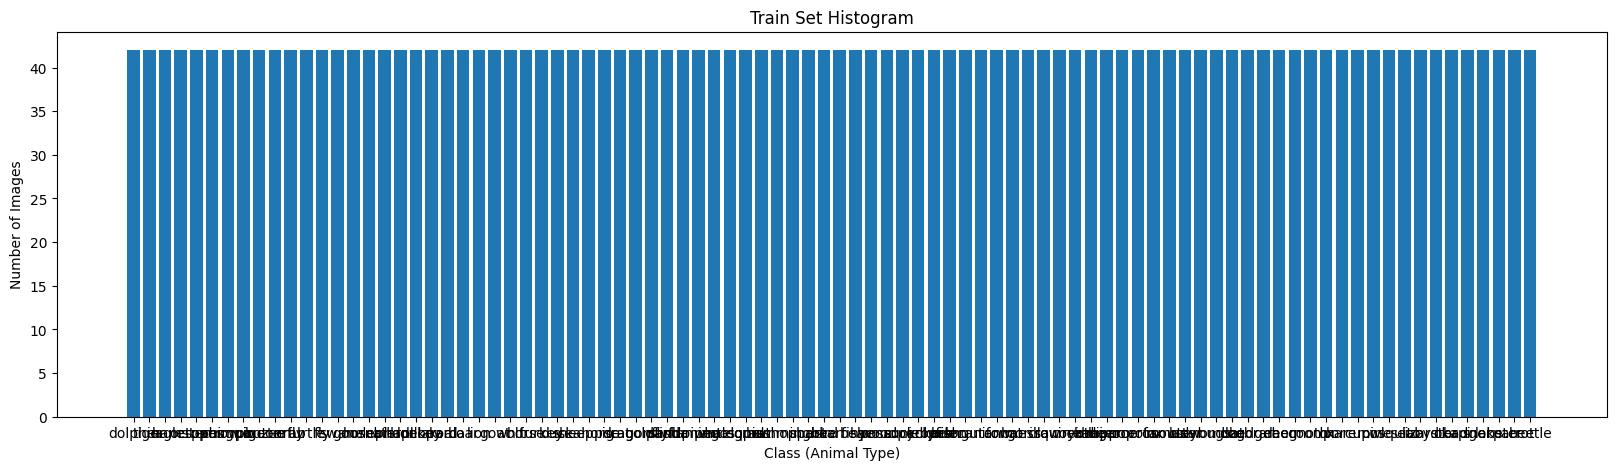

In [5]:
import matplotlib.pyplot as plt

directory = r'animals/train'

classes = os.listdir(directory)

image_counts = []

for cls in classes:
    class_path = os.path.join(directory, cls)
    image_counts.append(len(os.listdir(class_path)))

plt.figure(figsize=(20, 5)) 

plt.bar(range(len(classes)), image_counts, tick_label=classes)

plt.title('Train Set Histogram')
plt.xlabel('Class (Animal Type)')
plt.ylabel('Number of Images')

# Show the plot
plt.show()

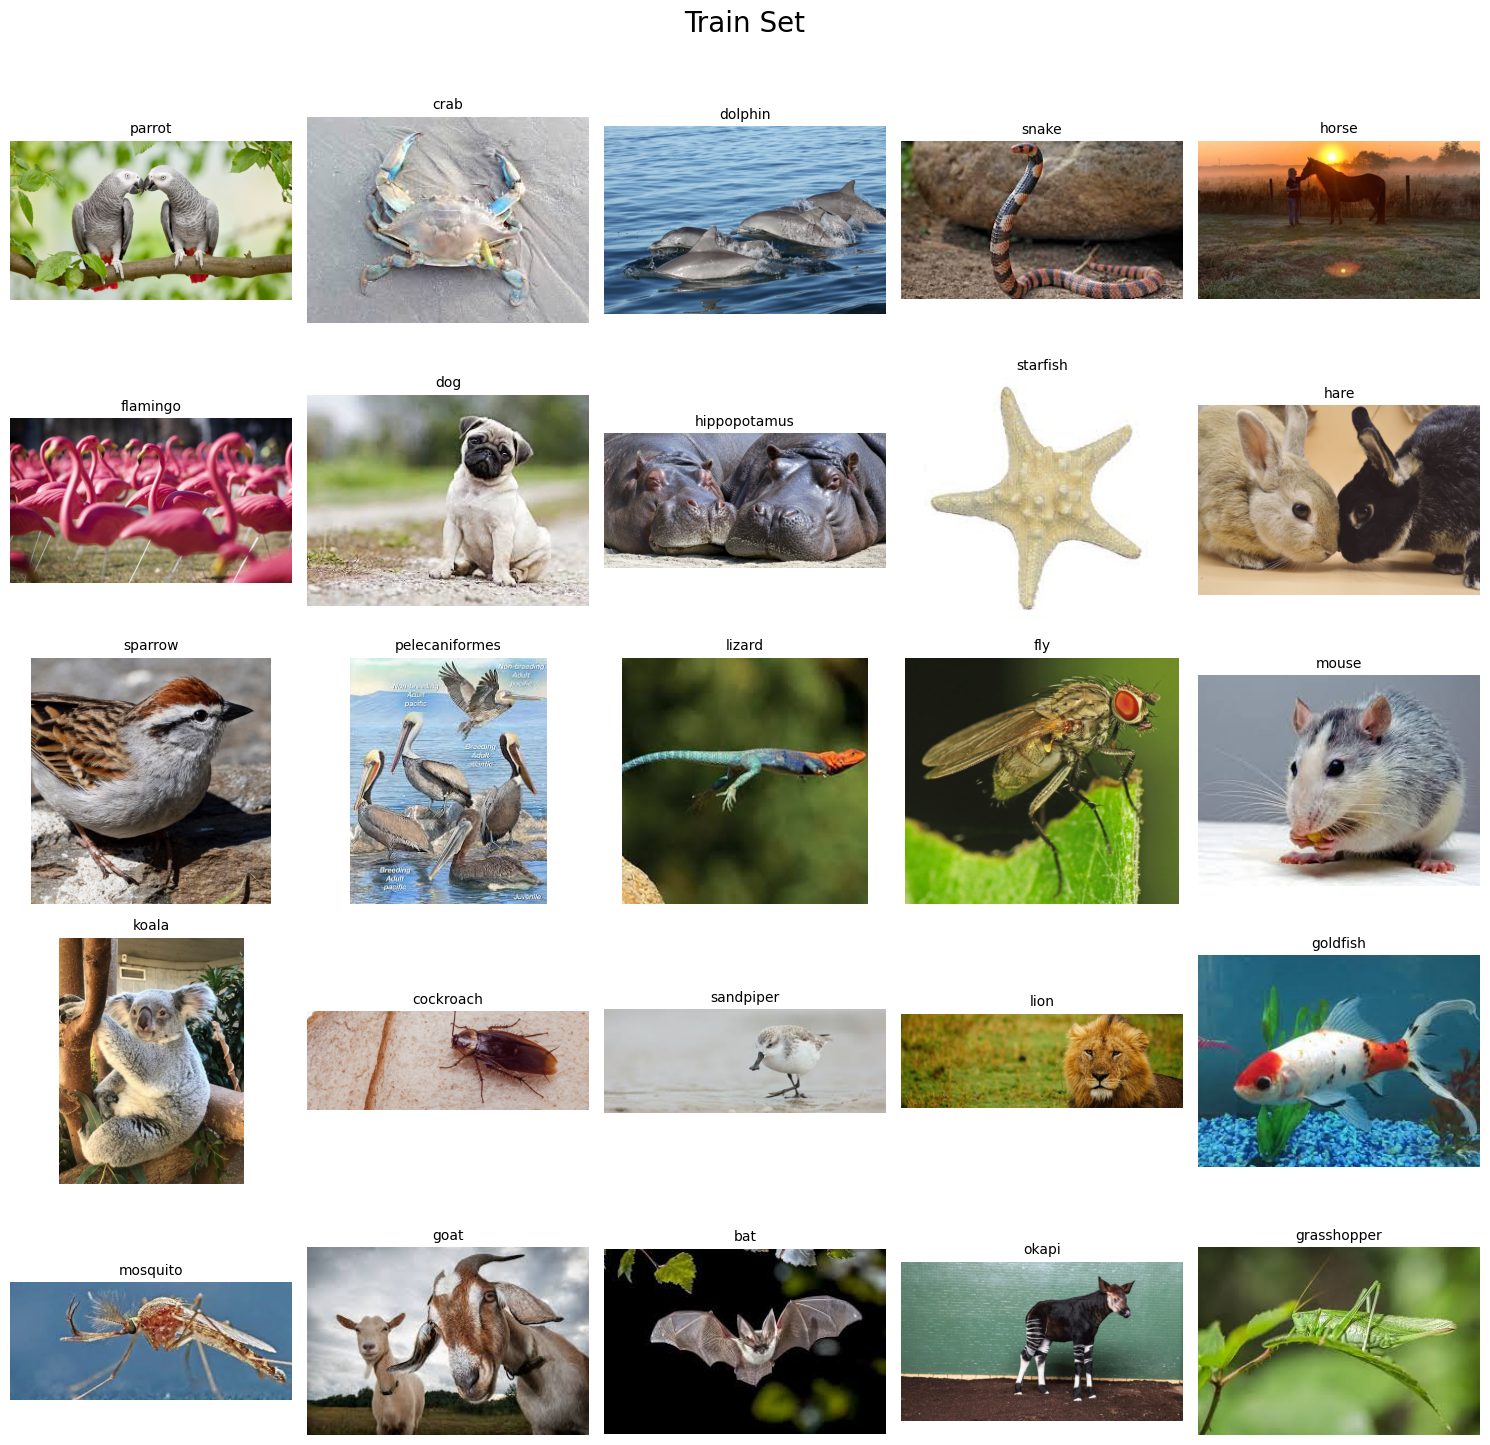

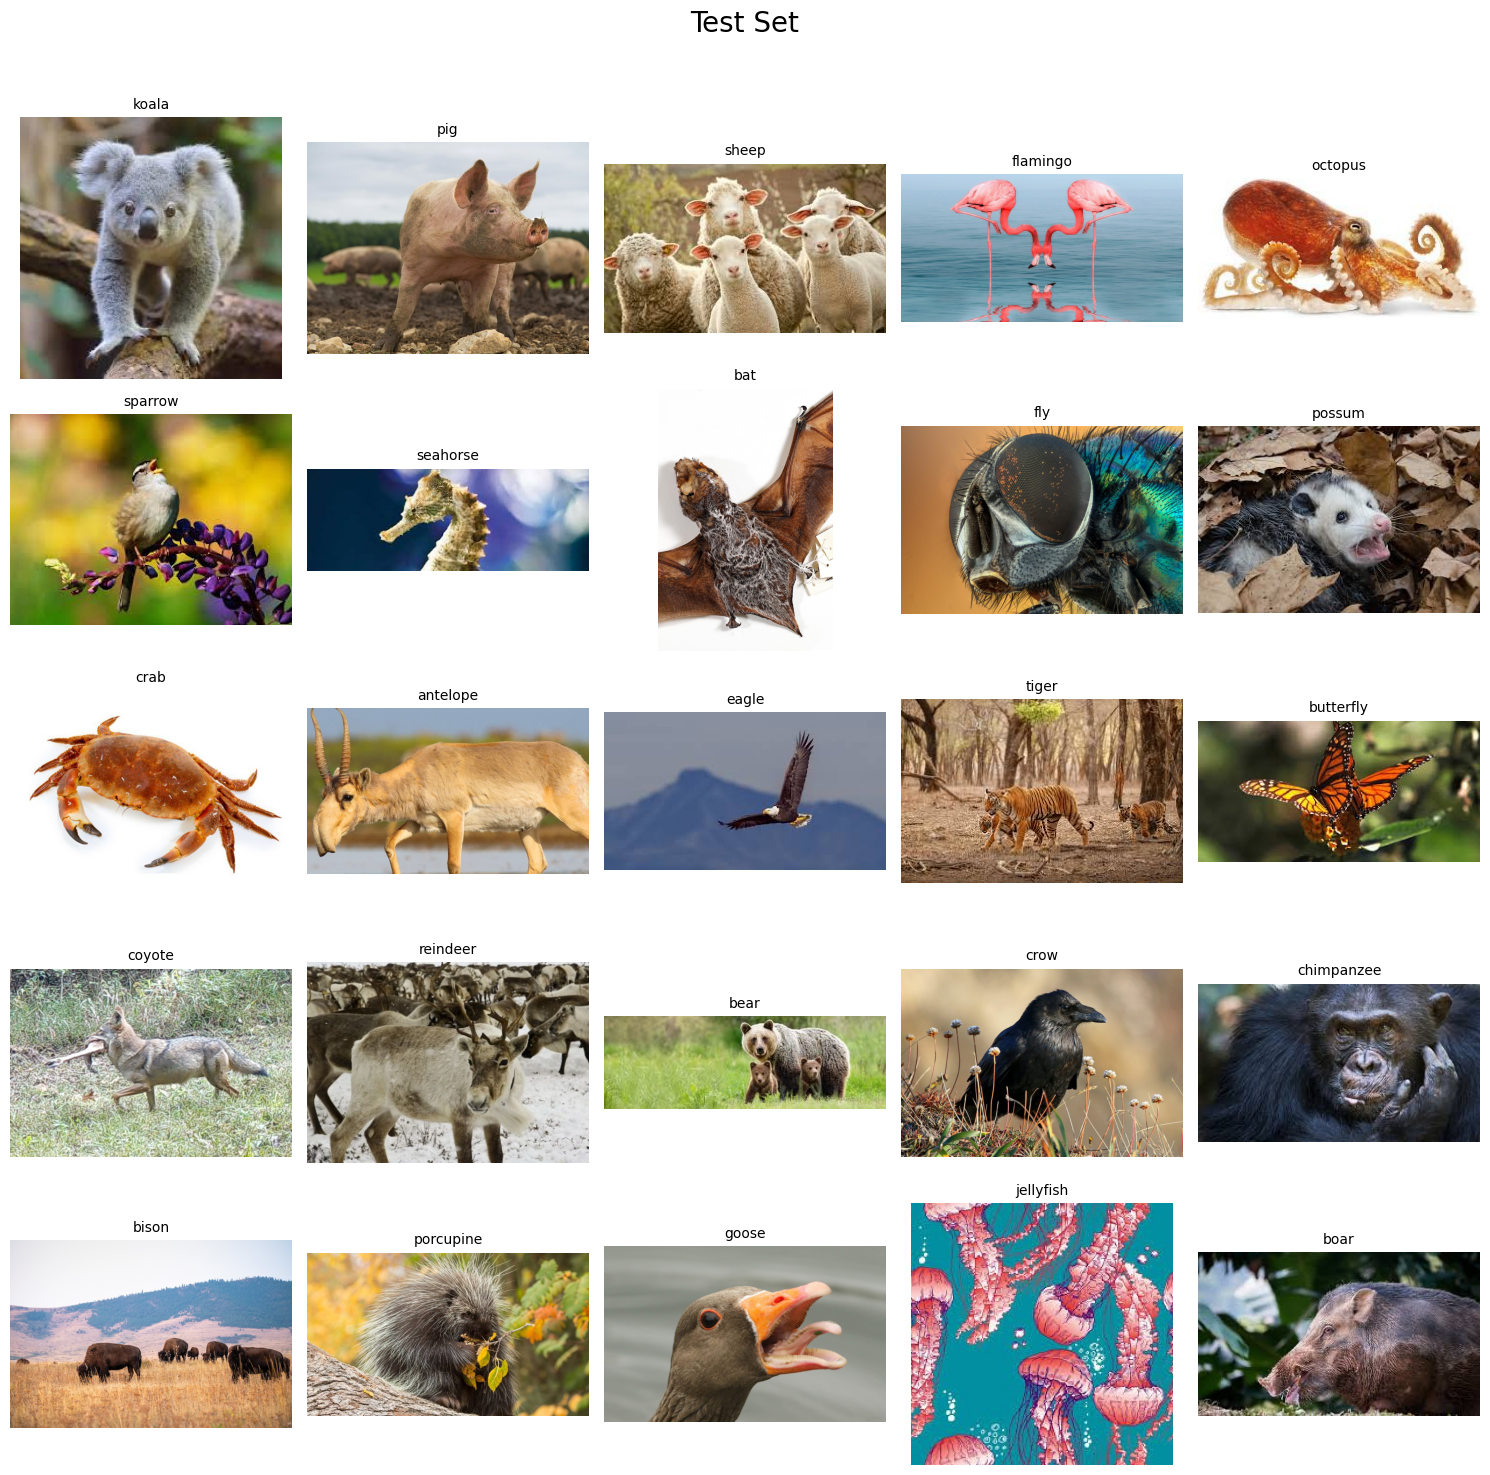

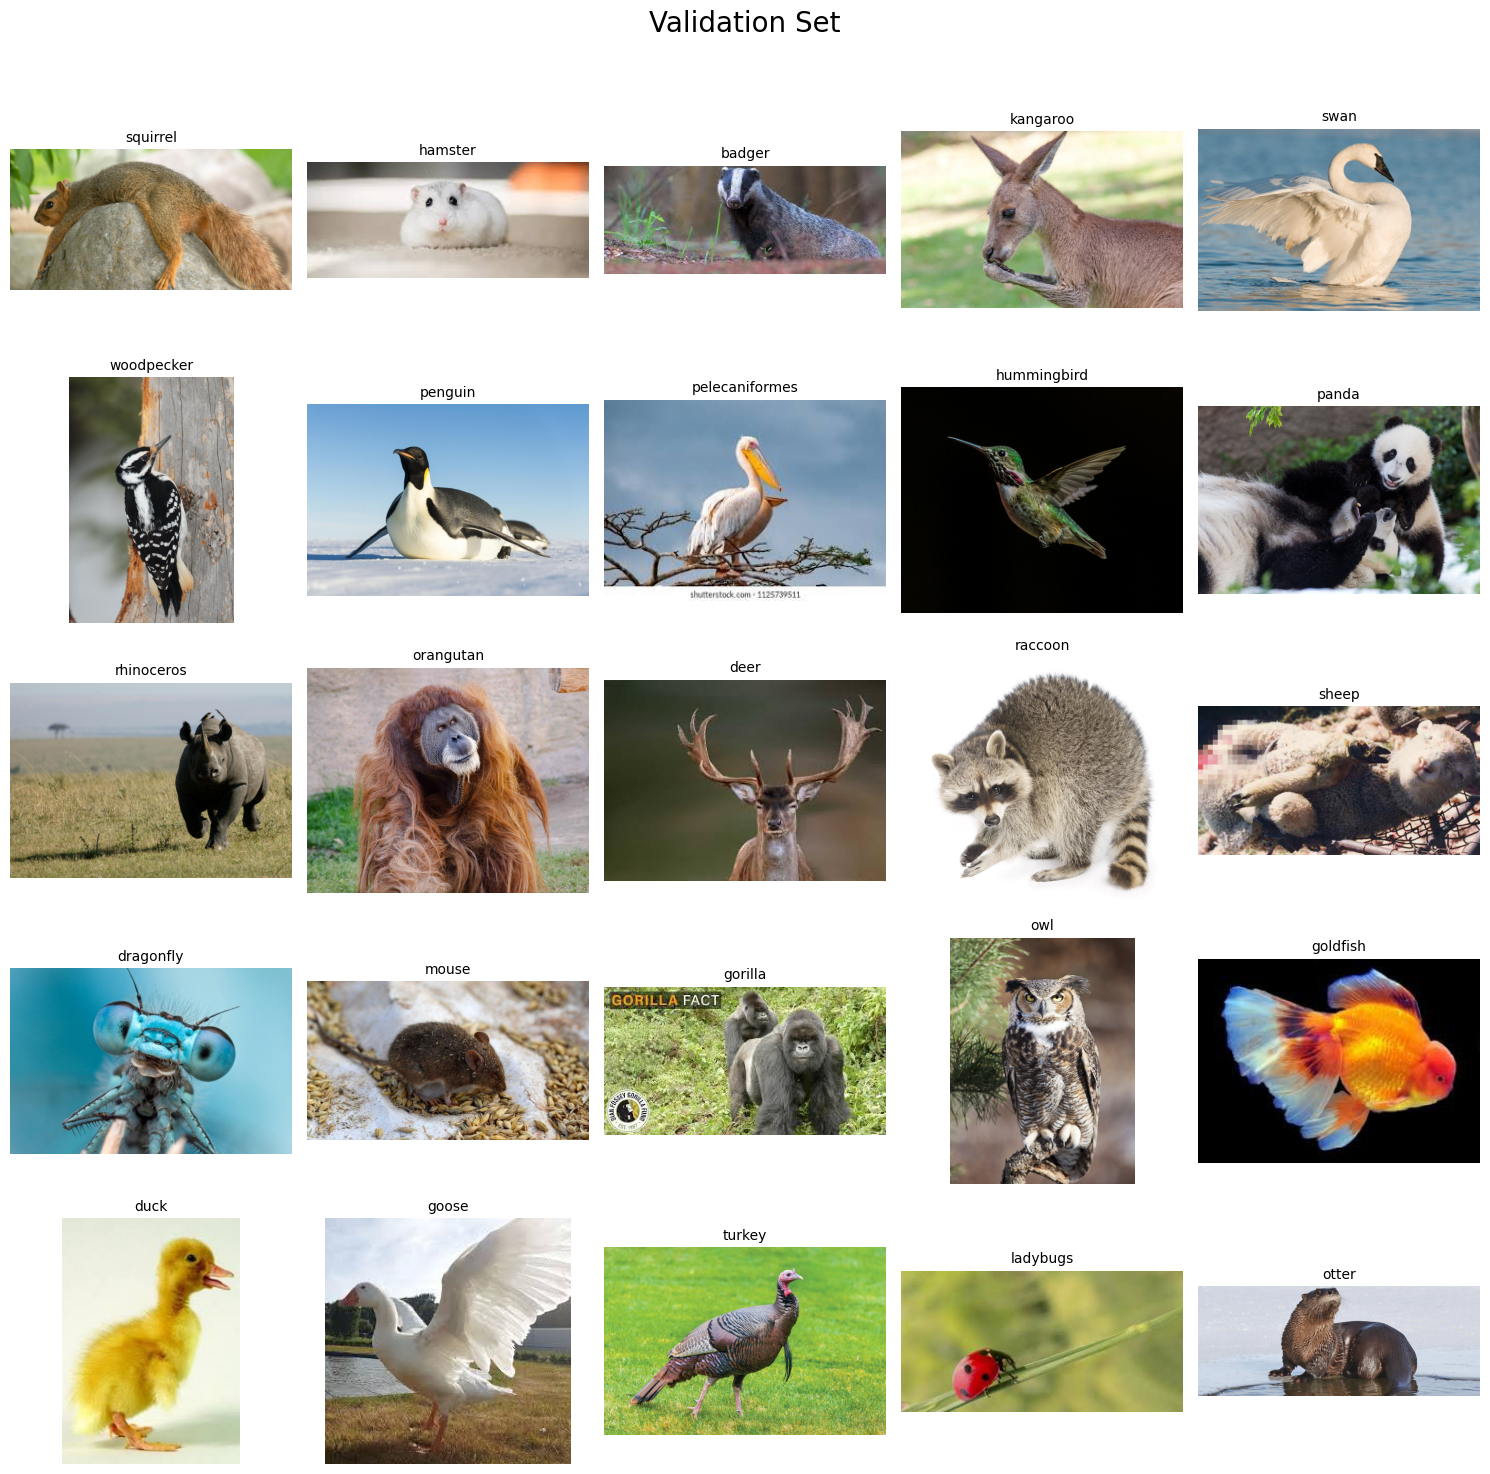

In [6]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def plot_images_from_each_class(directory, num_classes=25, title=''):
    classes = os.listdir(directory)
   
    num_classes = min(len(classes), num_classes)

    selected_classes = random.sample(classes, num_classes)

    plt.figure(figsize=(15, 15))
    plt.suptitle(title, fontsize=20)
    for i, cls in enumerate(selected_classes):
        path = os.path.join(directory, cls)
        if os.listdir(path):
            selected_image = random.choice(os.listdir(path))
            img = Image.open(os.path.join(path, selected_image))
            plt.subplot(5, 5, i+1)
            plt.imshow(img)
            plt.title(cls, fontsize=10)
            plt.axis("off")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

train_directory = 'animals/train'
test_directory = 'animals/test'
valid_directory = 'animals/valid'

plot_images_from_each_class(train_directory, title='Train Set')
plot_images_from_each_class(test_directory, title='Test Set')
plot_images_from_each_class(valid_directory, title='Validation Set')


In [8]:
#This uses the base model as a feature extractor and then we build the classifier model on top of it
#This only uses a Dense Layer and Softmax layer, we could expirement with dropout layers or normalization/regularization as well

from tensorflow.keras.applications import Xception 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from kerastuner.tuners import BayesianOptimization
import os

input_shape = (224, 224, 3)

train_directory = 'animals/train'
num_classes = len(os.listdir(train_directory))

base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

def build_model(hp):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    hp_units = hp.Int('units', min_value=512, max_value=1200, step=32)
    x = Dense(units=hp_units, activation='relu', 
              kernel_regularizer=regularizers.l2(0.01))(x)  # Added L2 regularization due to overfitting (first model was 99+% accurate for training and 86% for validation)
    predictions = Dense(num_classes, activation='softmax',
                        kernel_regularizer=regularizers.l2(0.01))(x)  # Added L2 regularization due to overfitting

    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 5e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model 

tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='my_dir',
    project_name='animal_species')

tuner.search(train_generator, validation_data=valid_generator)

Trial 100 Complete [00h 00m 35s]
val_accuracy: 0.8012345433235168

Best val_accuracy So Far: 0.8358024954795837
Total elapsed time: 00h 59m 34s
INFO:tensorflow:Oracle triggered exit


In [9]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""The optimal number of units: {best_hps.get('units')}, Optimal learning rate: {best_hps.get('learning_rate')}.
""")

The optimal number of units: 1184, Optimal learning rate: 0.0005.



In [10]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

model = tuner.hypermodel.build(best_hps)

model.fit(train_generator, epochs=30, validation_data=valid_generator, verbose=1)

Epoch 1/30
119/119 [==============================] - 34s 270ms/step - loss: 11.0214 - accuracy: 0.6257 - val_loss: 5.5526 - val_accuracy: 0.8160
Epoch 2/30
119/119 [==============================] - 32s 267ms/step - loss: 4.0247 - accuracy: 0.8124 - val_loss: 2.9670 - val_accuracy: 0.8099
Epoch 3/30
119/119 [==============================] - 32s 269ms/step - loss: 2.6520 - accuracy: 0.8288 - val_loss: 2.4022 - val_accuracy: 0.8198
Epoch 4/30
119/119 [==============================] - 33s 275ms/step - loss: 2.3192 - accuracy: 0.8352 - val_loss: 2.2622 - val_accuracy: 0.8173
Epoch 5/30
119/119 [==============================] - 32s 267ms/step - loss: 2.2397 - accuracy: 0.8315 - val_loss: 2.1517 - val_accuracy: 0.8321
Epoch 6/30
119/119 [==============================] - 32s 272ms/step - loss: 2.1903 - accuracy: 0.8344 - val_loss: 2.1524 - val_accuracy: 0.8296
Epoch 7/30
119/119 [==============================] - 33s 275ms/step - loss: 2.1623 - accuracy: 0.8333 - val_loss: 2.1604 - val_a

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

model.save('animal_species_model.h5')

26/26 [==============================] - 3s 91ms/step - loss: 1.9564 - accuracy: 0.8333
Test accuracy: 0.8333333134651184


/home/jakebrewer/anaconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
print(len(model.layers))

135


In [13]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the model
model = load_model('animal_species_model.h5')

# Make all layers non-trainable
for layer in model.layers:
    layer.trainable = False

# Unfreeze layers from "start_fine_tuning_at"
start_fine_tuning_at = 90  
for layer in model.layers[start_fine_tuning_at:]:
    layer.trainable = True

# Callbacks
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_path = 'best_model.h5'
checkpoint_cb = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Compilation
model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Training
history = model.fit(train_generator, 
                    validation_data=valid_generator, 
                    epochs=50,
                    callbacks=[early_stopping_cb, checkpoint_cb],
                    verbose=1)

# Best validation accuracy
val_accuracy = max(history.history['val_accuracy'])
print(f"Overall Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/50
119/119 [==============================] - 43s 283ms/step - loss: 2.0429 - accuracy: 0.7616 - val_loss: 1.6602 - val_accuracy: 0.7975
Epoch 2/50
119/119 [==============================] - 35s 293ms/step - loss: 1.3380 - accuracy: 0.8884 - val_loss: 1.5266 - val_accuracy: 0.8062
Epoch 3/50
119/119 [==============================] - 32s 271ms/step - loss: 1.0698 - accuracy: 0.9423 - val_loss: 1.3793 - val_accuracy: 0.8309
Epoch 4/50
119/119 [==============================] - 33s 275ms/step - loss: 0.9664 - accuracy: 0.9534 - val_loss: 1.2346 - val_accuracy: 0.8593
Epoch 5/50
119/119 [==============================] - 32s 270ms/step - loss: 0.8533 - accuracy: 0.9717 - val_loss: 1.1450 - val_accuracy: 0.8568
Epoch 6/50
119/119 [==============================] - 32s 271ms/step - loss: 0.7669 - accuracy: 0.9772 - val_loss: 1.2102 - val_accuracy: 0.8531
Epoch 7/50
119/119 [==============================] - 33s 275ms/step - loss: 0.7544 - accuracy: 0.9799 - val_loss: 1.0596 - val_ac

In [14]:
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

26/26 [==============================] - 3s 89ms/step - loss: 1.0447 - accuracy: 0.8790
Test accuracy: 0.8790123462677002


In [15]:
import os
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
from kerastuner.tuners import BayesianOptimization

img_width2, img_height2 = 224, 224

train_directory2 = 'animals/train'
num_classes2 = len(os.listdir(train_directory2))

def build_model2(hp):
    model2 = Sequential()
    model2.add(layers.Conv2D(filters=hp.Int('conv_1_filter2', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('conv_1_kernel2', values=[3,5]),
                            activation='relu',
                            input_shape=(img_width2, img_height2, 3)))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model2.add(layers.Conv2D(filters=hp.Int('conv_2_filter2', min_value=32, max_value=64, step=16),
                            kernel_size=hp.Choice('conv_2_kernel2', values=[3,5]),
                            activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model2.add(layers.Conv2D(filters=hp.Int('conv_3_filter2', min_value=32, max_value=64, step=16),
                            kernel_size=hp.Choice('conv_3_kernel2', values=[3,5]),
                            activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model2.add(layers.Flatten())
    model2.add(layers.Dense(units=hp.Int('dense_1_units2', min_value=32, max_value=128, step=16),
                           activation='relu'))
    model2.add(layers.Dropout(rate=hp.Float('dropout_1_rate2', min_value=0.0, max_value=0.5, step=0.1)))
    model2.add(layers.Dense(num_classes2, activation='softmax'))

    model2.compile(optimizer=Adam(hp.Float('learning_rate2', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model2 

tuner2 = BayesianOptimization(
    build_model2,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='my_dir2',
    project_name='animal_species2')

tuner2.search(train_generator, validation_data=valid_generator)





INFO:tensorflow:Reloading Tuner from my_dir2/animal_species2/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [16]:
best_hps2 = tuner2.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The optimal number of units in the first convolutional layer: {best_hps2.get('conv_1_filter2')},
The optimal kernel size in the first convolutional layer: {best_hps2.get('conv_1_kernel2')},
The optimal number of units in the second convolutional layer: {best_hps2.get('conv_2_filter2')},
The optimal kernel size in the second convolutional layer: {best_hps2.get('conv_2_kernel2')},
The optimal number of units in the third convolutional layer: {best_hps2.get('conv_3_filter2')},
The optimal kernel size in the third convolutional layer: {best_hps2.get('conv_3_kernel2')},
The optimal number of units in the dense layer: {best_hps2.get('dense_1_units2')},
The optimal dropout rate in the dropout layer: {best_hps2.get('dropout_1_rate2')},
Optimal learning rate: {best_hps2.get('learning_rate2')}.
""")




The optimal number of units in the first convolutional layer: 32,
The optimal kernel size in the first convolutional layer: 5,
The optimal number of units in the second convolutional layer: 48,
The optimal kernel size in the second convolutional layer: 3,
The optimal number of units in the third convolutional layer: 48,
The optimal kernel size in the third convolutional layer: 5,
The optimal number of units in the dense layer: 64,
The optimal dropout rate in the dropout layer: 0.1,
Optimal learning rate: 0.0002216656935695649.



In [18]:
model2 = tuner2.hypermodel.build(best_hps2)

model2.fit(train_generator, 
                    validation_data=valid_generator, 
                    epochs=300,
                    callbacks=[early_stopping_cb],
                    verbose=1)

Epoch 1/300
119/119 [==============================] - 59s 483ms/step - loss: 4.4973 - accuracy: 0.0132 - val_loss: 4.4533 - val_accuracy: 0.0259
Epoch 2/300
119/119 [==============================] - 34s 275ms/step - loss: 4.4358 - accuracy: 0.0294 - val_loss: 4.3569 - val_accuracy: 0.0358
Epoch 3/300
119/119 [==============================] - 32s 269ms/step - loss: 4.3440 - accuracy: 0.0381 - val_loss: 4.2641 - val_accuracy: 0.0469
Epoch 4/300
119/119 [==============================] - 32s 265ms/step - loss: 4.2688 - accuracy: 0.0452 - val_loss: 4.1761 - val_accuracy: 0.0679
Epoch 5/300
119/119 [==============================] - 33s 278ms/step - loss: 4.1709 - accuracy: 0.0540 - val_loss: 4.0798 - val_accuracy: 0.0802
Epoch 6/300
119/119 [==============================] - 33s 274ms/step - loss: 4.0797 - accuracy: 0.0746 - val_loss: 4.0045 - val_accuracy: 0.1037
Epoch 7/300
119/119 [==============================] - 32s 270ms/step - loss: 3.9936 - accuracy: 0.0828 - val_loss: 3.9234 -

In [19]:
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

model2.save('animal_species_model2.h5')

26/26 [==============================] - 3s 99ms/step - loss: 3.1262 - accuracy: 0.2444
Test accuracy: 0.24444444477558136
